In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import datetime
import numpy as np

import matplotlib.pyplot as plt

In [2]:
INSTANCE_ID = "61f08437-4a86-49a7-8514-65f265c5b252"

In [3]:
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox

In [4]:
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

In [6]:
ffs_coords = [-166.4329, 23.9286, -166.0215,  23.5622]

In [6]:
ffs_box = BBox(bbox=ffs_coords, crs=CRS.WGS84)

# Sentinel 2

In [7]:
wms_true_color_request = WmsRequest(layer='TRUE-COLOR-S2-L1C',
                                    bbox=ffs_box,
                                    time=('1990-01-01', '2017-12-31'),
                                    width = 500,
                                    instance_id=INSTANCE_ID)

print(wms_true_color_request)

In [8]:
wms_true_color_img = wms_true_color_request.get_data()

In [9]:
print('These %d images were taken on the following dates:' % len(wms_true_color_img))
for index, date in enumerate(wms_true_color_request.get_dates()):
    print(' - image %d was taken on %s' % (index, date))

These 2 images were taken on the following dates:
 - image 0 was taken on 2015-08-27 21:49:03
 - image 1 was taken on 2017-08-11 21:49:04


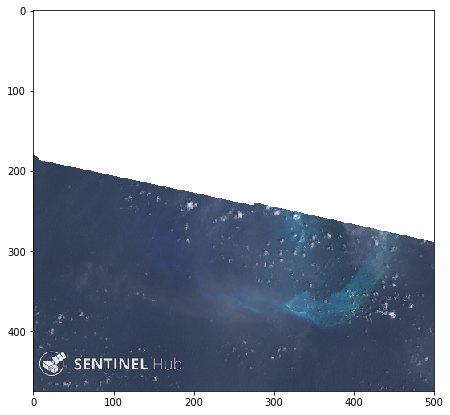

In [10]:

plot_image(wms_true_color_img[-2])

## Black Rock City

In [7]:
brc_coords = [-119.2444,  40.8171, -119.1890,   40.7482]
brc_coords = BBox(bbox=brc_coords, crs=CRS.WGS84)

wms_true_color_request = WmsRequest(layer='TRUE-COLOR-S2-L1C',
                                    bbox=brc_coords,
                                    time=('2018-08-23', '2018-09-17'),
                                    width = 1000,
                                    instance_id=INSTANCE_ID)

wms_true_color_img = wms_true_color_request.get_data()

print('These %d images were taken on the following dates:' % len(wms_true_color_img))
for index, date in enumerate(wms_true_color_request.get_dates()):
    print(' - image %d was taken on %s' % (index, date))


These 11 images were taken on the following dates:
 - image 0 was taken on 2018-08-23 18:55:56
 - image 1 was taken on 2018-08-25 18:44:30
 - image 2 was taken on 2018-08-28 18:55:19
 - image 3 was taken on 2018-08-30 18:42:31
 - image 4 was taken on 2018-09-02 18:58:13
 - image 5 was taken on 2018-09-04 18:52:52
 - image 6 was taken on 2018-09-07 18:57:08
 - image 7 was taken on 2018-09-09 18:45:44
 - image 8 was taken on 2018-09-12 18:54:57
 - image 9 was taken on 2018-09-14 18:51:20
 - image 10 was taken on 2018-09-17 18:51:47


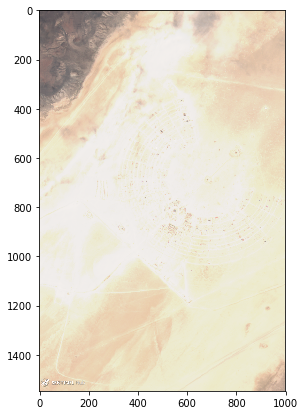

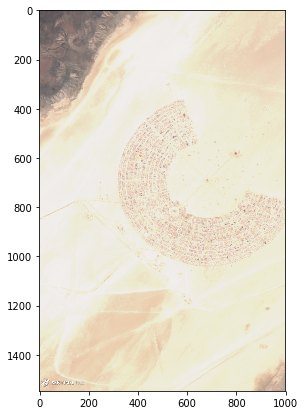

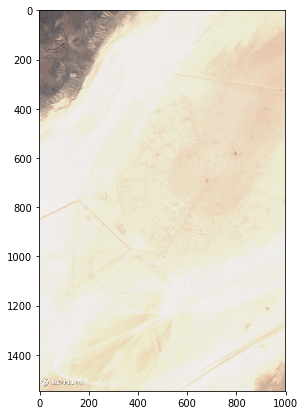

In [15]:

plot_image(wms_true_color_img[0])
plot_image(wms_true_color_img[2])
plot_image(wms_true_color_img[10])




## Multi-Band

In [ ]:
wms_bands_request = WmsRequest(layer='BANDS-S2-L1C',
                               bbox=ffs_box,
                               time='latest',
                               width=500, height=500,
                               image_format=MimeType.TIFF_d32f,
                               instance_id=INSTANCE_ID)
wms_bands_img = wms_bands_request.get_data()

In [ ]:
plot_image(wms_bands_img[-1][:, :, 12])

# MODIS/LANDSAT Attempts

Prior to running this, the OGC endpoint needs to be changed in the terminal. This command should do the trick:
`sentinelhub.config --ogc_base_url https://services-uswest2.sentinel-hub.com/ogc/`

The endpoint URL for the Sentinel data is https://services.sentinel-hub.com/ogc/.

In [13]:
wms_true_color_request = WmsRequest(layer='TRUE-COLOR-MODIS',
                                    bbox=ffs_box,
                                    time=('1990-01-01', '2017-12-31'),
                                    width = 500,
                                    instance_id=INSTANCE_ID)
wms_true_color_img = wms_true_color_request.get_data()

In [14]:
print('These %d images were taken on the following dates:' % len(wms_true_color_img))
for index, date in enumerate(wms_true_color_request.get_dates()):
    print(' - image %d was taken on %s' % (index, date))

These 2 images were taken on the following dates:
 - image 0 was taken on 2015-08-27 21:49:03
 - image 1 was taken on 2017-08-11 21:49:04


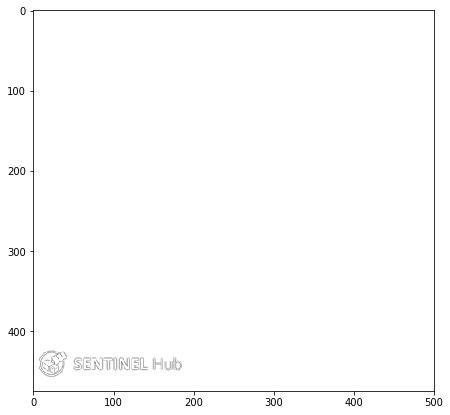

In [15]:

plot_image(wms_true_color_img[-2])

## Black Rock City

In [6]:
brc_coords = [-119.2444,  40.8171, -119.1890,   40.7482]
brc_coords = BBox(bbox=brc_coords, crs=CRS.WGS84)

wms_true_color_request = WmsRequest(layer='TRUE-COLOR-MODIS',
                                    bbox=brc_coords,
                                    time=('2018-08-23', '2018-09-17'),
                                    width = 1000,
                                    instance_id=INSTANCE_ID)

wms_true_color_img = wms_true_color_request.get_data()

print('These %d images were taken on the following dates:' % len(wms_true_color_img))
for index, date in enumerate(wms_true_color_request.get_dates()):
    print(' - image %d was taken on %s' % (index, date))

These 11 images were taken on the following dates:
 - image 0 was taken on 2018-08-23 18:55:56
 - image 1 was taken on 2018-08-25 18:44:30
 - image 2 was taken on 2018-08-28 18:55:19
 - image 3 was taken on 2018-08-30 18:42:31
 - image 4 was taken on 2018-09-02 18:58:13
 - image 5 was taken on 2018-09-04 18:52:52
 - image 6 was taken on 2018-09-07 18:57:08
 - image 7 was taken on 2018-09-09 18:45:44
 - image 8 was taken on 2018-09-12 18:54:57
 - image 9 was taken on 2018-09-14 18:51:20
 - image 10 was taken on 2018-09-17 18:51:47


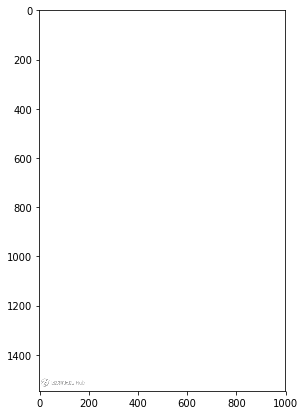

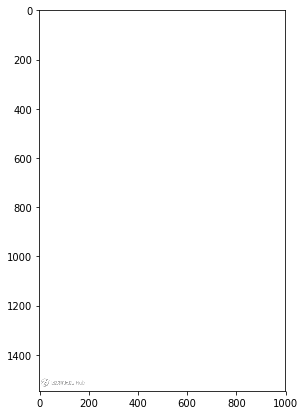

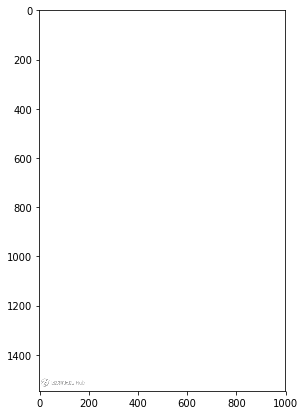

In [7]:
plot_image(wms_true_color_img[0])
plot_image(wms_true_color_img[2])
plot_image(wms_true_color_img[10])